In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

# pycupid
from pycupid import *

# just for presentation
import warnings
warnings.filterwarnings("ignore")

target_path = '/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/VarClump/'

In [2]:
def gaussian2D(A, mu, sig, dims=(150,150)):
    x = np.linspace(0., 1., dims[0]+2)[1:-1]
    y = np.linspace(0., 1., dims[1]+2)[1:-1]
    X,Y = np.meshgrid(x,y)
    _X = X-mu[0]
    _Y = Y-mu[1]
    a = sig[0]; b=sig[1]; c=sig[2]
    return A * np.exp(- (a*_X**2 - 2*b*_X*_Y + c*_Y**2))

In [3]:
np.random.seed(0)

g0 = gaussian2D(0.20, [0.7,0.3], [400,20,200])
g1 = gaussian2D(0.20, [0.63,0.35], [600,75,50])
g2 = gaussian2D(0.22, [0.52,0.38], [100,20,200])
g3 = gaussian2D(0.13, [0.6,0.2], [800,10,900])
g4 = gaussian2D(0.17, [0.78,0.3], [1000,20,900])
g5 = gaussian2D(0.17, [0.72,0.42], [800,30,1000])
g6 = gaussian2D(0.17, [0.40,0.75], [100,20,70])
g7 = gaussian2D(0.21, [0.25,0.8], [80,20,100])

cx = 150*np.array([0.7, 0.63, 0.52, 0.6, 0.78, 0.72, 0.40, 0.25])
cy = 150*np.array([0.3, 0.35, 0.38, 0.2, 0.3, 0.42, 0.75, 0.8])

dims = (150,150)
noise_level = 0.01
noise = noise_level * np.abs(np.random.randn(*dims))
mean_noise = np.mean(noise)
rms_noise = estimate_rms(noise)
var_noise = np.std(noise)**2

data = g0+g1+g2+g3+g4+g5+g6+g7+noise
data -= data.min()
data /= data.max()

x = np.linspace(0., 1., data.shape[0]+2, endpoint=True)[1:-1]
y = np.linspace(0., 1., data.shape[1]+2, endpoint=True)[1:-1]
dfunc = RegularGridInterpolator((x,y), data, method='linear', bounds_error=False, fill_value=0.)

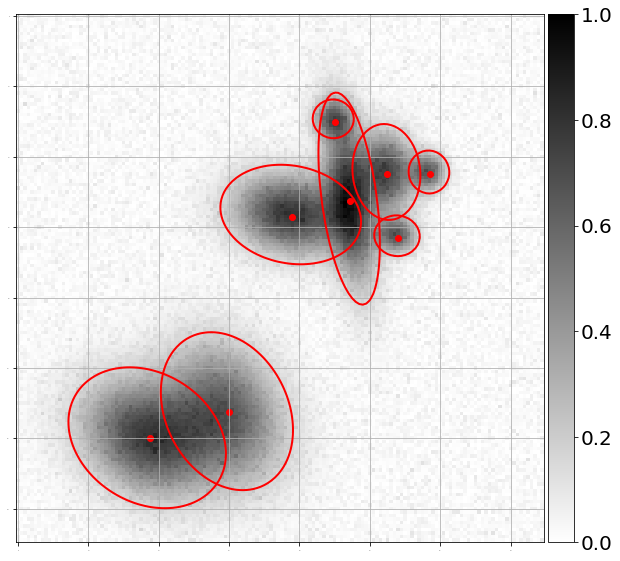

In [25]:
plt.figure(figsize=(10,10))
im = plt.imshow(data, cmap=plt.cm.gray_r, interpolation=None)
plt.scatter(cx, cy, c="red")
plt.contour(g0, colors='red', levels=[4*rms_noise], linewidths=2)
plt.contour(g1, colors='red', levels=[4*rms_noise], linewidths=2)
plt.contour(g2, colors='red', levels=[4*rms_noise], linewidths=2)
plt.contour(g3, colors='red', levels=[4*rms_noise], linewidths=2)
plt.contour(g4, colors='red', levels=[4*rms_noise], linewidths=2)
plt.contour(g5, colors='red', levels=[4*rms_noise], linewidths=2)
plt.contour(g6, colors='red', levels=[4*rms_noise], linewidths=2)
plt.contour(g7, colors='red', levels=[4*rms_noise], linewidths=2)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=0)
#plt.title(title)
#plt.axis('off')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.tick_params(axis='both', which='major', labelsize=20)
#plt.xlabel(x_label, fontsize=20)
plt.savefig(target_path+'synthetic.eps', format='eps', dpi=100)
plt.show()